In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
# code directly copied from covid19api to query covid19 data in singapore for all type of cases
import requests

url = "https://api.covid19api.com/total/country/singapore"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

df=pd.DataFrame(response.json())

In [3]:
df=df[["Country","Confirmed","Deaths","Recovered","Active","Date"]]

In [4]:
df["Date"]=pd.to_datetime(df["Date"])

In [5]:
#graph would be more meaningful to show daily confirmed, daily death, daily recovered

In [6]:
df["previous_confirmed"]=df["Confirmed"].shift(1, fill_value=0)
df["previous_deaths"]=df["Deaths"].shift(1, fill_value=0)
df["previous_recovered"]=df["Recovered"].shift(1, fill_value=0)

In [7]:
df["daily_confirmed"]=df["Confirmed"] - df["previous_confirmed"]
df["daily_deaths"]=df["Deaths"] - df["previous_deaths"]
df["daily_recovered"]=df["Recovered"] - df["previous_recovered"]

In [8]:
#df with daily confirmed, daily death, daily recovered
df_daily=df[["Country","daily_confirmed","daily_deaths","daily_recovered","Active","Date"]]

In [9]:
#until 2021-08-04; where data all correct
df_daily_cut = df_daily[df_daily["Date"]< "2021-08-05"]

In [10]:
#until latest date for daily_confirmed, daily_death
df_daily_full = df_daily[["Country","daily_confirmed","daily_deaths","Date"]]

In [11]:
#set default size of graph bigger
plt.rcParams['figure.figsize'] = [12, 5]

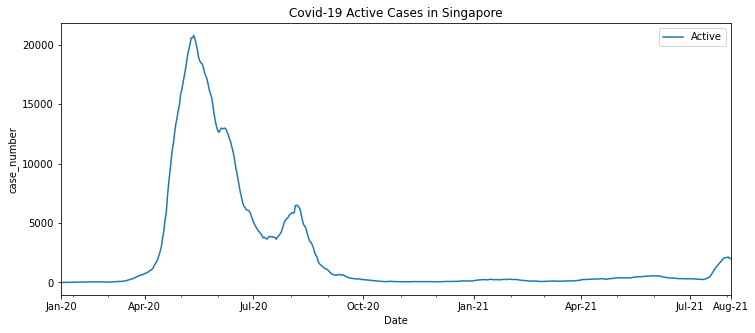

In [12]:
#plot line graph for active cases across time; only till 2021-08-04
df_daily_cut.plot(x="Date",y="Active",kind="line")

plt.xlabel("Date")
plt.ylabel("case_number")
plt.title("Covid-19 Active Cases in Singapore")

date_form = DateFormatter("%b-%y")
ax=plt.gca()
ax.xaxis.set_major_formatter(date_form)

plt.show()

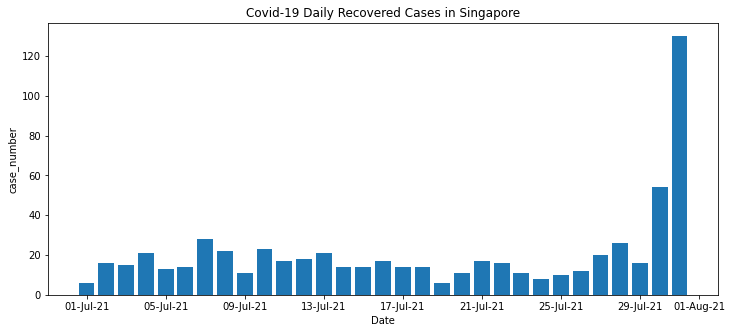

In [13]:
#plot bar chart for daily_recovered cases in a given date range

start_date_e="2021-07-01" #set the start date here
end_date_f="2021-07-31" #set the end date here; only till 2021-08-04

e=df_daily_cut[df_daily_cut["Date"].dt.strftime("%Y-%m-%d")==start_date_e].index.tolist()[0]
f=df_daily_cut[df_daily_cut["Date"].dt.strftime("%Y-%m-%d")==end_date_f].index.tolist()[0]

df_daily_recovered_date = df_daily_cut.iloc[e:f+1,:]
plt.bar(df_daily_recovered_date["Date"],df_daily_recovered_date["daily_recovered"])

date_form = DateFormatter("%d-%b-%y")
ax=plt.gca()
ax.xaxis.set_major_formatter(date_form)

plt.xlabel("Date")
plt.ylabel("case_number")
plt.title("Covid-19 Daily Recovered Cases in Singapore")

plt.show()

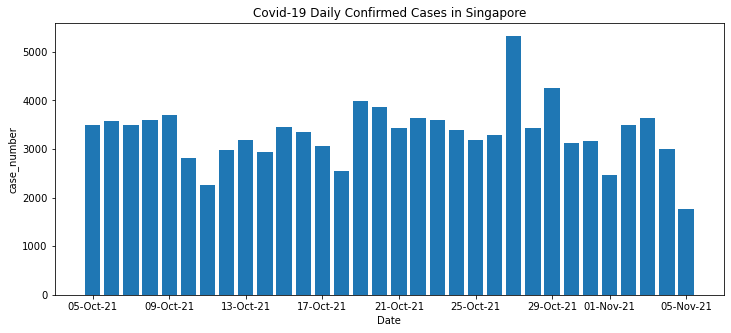

In [14]:
#plot bar chart for daily_confirmed cases in a given date range

start_date_a="2021-10-05" #set the start date here
end_date_b="2021-11-05" #set the end date here; can till latest date

a=df_daily_full[df_daily_full["Date"].dt.strftime("%Y-%m-%d")==start_date_a].index.tolist()[0]
b=df_daily_full[df_daily_full["Date"].dt.strftime("%Y-%m-%d")==end_date_b].index.tolist()[0]

df_daily_confirmed_date = df_daily_full.iloc[a:b+1,:]
plt.bar(df_daily_confirmed_date["Date"],df_daily_confirmed_date["daily_confirmed"])

date_form = DateFormatter("%d-%b-%y")
ax=plt.gca()
ax.xaxis.set_major_formatter(date_form)

plt.xlabel("Date")
plt.ylabel("case_number")
plt.title("Covid-19 Daily Confirmed Cases in Singapore")

plt.show()

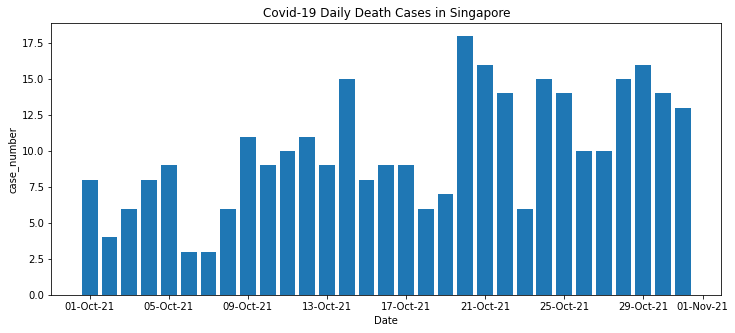

In [15]:
#plot bar chart for daily_deaths cases in a given date range

start_date_c="2021-10-01" #set the start date here
end_date_d="2021-10-31" #set the end date here; can till latest date

c=df_daily_full[df_daily_full["Date"].dt.strftime("%Y-%m-%d")==start_date_c].index.tolist()[0]
d=df_daily_full[df_daily_full["Date"].dt.strftime("%Y-%m-%d")==end_date_d].index.tolist()[0]

df_daily_deaths_date = df_daily_full.iloc[c:d+1,:]
plt.bar(df_daily_deaths_date["Date"],df_daily_deaths_date["daily_deaths"])

date_form = DateFormatter("%d-%b-%y")
ax=plt.gca()
ax.xaxis.set_major_formatter(date_form)

plt.xlabel("Date")
plt.ylabel("case_number")
plt.title("Covid-19 Daily Death Cases in Singapore")

plt.show()